# Time-series data

## Background

The natural system generates time-series data such as for the weather, for earthquake, and others. Our everyday activities are also a good source of time-series data. These data can be related to health, physical exercise, stock market, sales market, and others. Due to a similar type of data from diverse domains, my interest goes to design the model using a deep learning network to predict potential future occurrences.

Here are a few simple questions:
* __Weather: What would be the temperature in the next 24 hours?/ Is there going to be snow/rain in the next 24 hours?__
* __Earthquake: Can we identify when would be next earthquake?__
* __Retailer: Can the profit be maximized in the next fiscal year?__
* __Health: What would be a weight of person based on current daily activity?__

Of course, diverse domains can have their unique purpose and question but a common phenomenon is a recurrent event and monitoring the data in a periodic time interval can help to explore a potential future event. Due to the similarity in data, a generic machine learning model can be designed. 

## Goal

* The primary goal is to develop a reusable code and generic framework that can be used for diverse datasets from time series data with minimal or no change.


## Case: weather forecasting

### Question
1. __Can a designed model predict a temperature for the next 2 or 3 or 12 or 24 hours?__

### Dataset
Some of attributes of [weather dataset](https://www.bgc-jena.mpg.de/wetter/weather_data.html) are as follows: 

1. Date Time
2. Pressure at sea level (mbar)
3. Temperature ($^\circ$C)
4. Temperature relative to humidity ($^\circ$C)
5. Relative humidity (%)
6. Vapor pressure (mbar)
7. Specific humidity (g/kg)
8. Water vapor concentration (mmol/mol)
9. Airtight (g/m**3)
10. Wind velecity (m/s)
11. Wind direction ($^\circ$)

### Methods and Results
As a part of the pipeline, the preliminary step was [data cleaning](https://github.com/exchhattu/TimeSeriesWeatherForecast-Regression-SVR/blob/master/notebook/Weather.ipynb) followed by model development. The standalone program was developed to build a [recurrent neural network model](https://github.com/exchhattu/TimeseriesWeatherForecast-RNN-GRU-LSTM/blob/master/src/RNNmodel.py). Here are steps used in the program. 
* Embedded layer was used to convert categorical data such as the date and merge with other numeric features. 
* Long short term memory (LSTM) and gated recurrent model (GRU) were tested with different architecture. 
* Monitor the trend of loss function over epoch for training and validating datasets.



#### Gated Recurrent Model (GRU)
```python3
$ python3 ./GRU.py -e -i ./../data/jena_climate_2009_2016.csv

Where,
-e: merge embedded columns
-p: hours for prediction (default=24 hours)
```

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import seaborn as sns

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

font      = {'family':'arial', 'style':'normal', 'size':18}
axis_font = {'family':'arial', 'style':'normal', 'size':18}
plt.rc('font', **font)

In [2]:
import pandas as pd

pd_data = pd.read_csv("./data/GRU_MLayer_eDefault.log")
pd_data.head()

,epoch,loss,val_loss
0,1,0.28414,0.13256
1,2,0.14911,0.14045
2,3,0.14040,0.12985
3,4,0.13675,0.12993
4,5,0.13020,0.13310


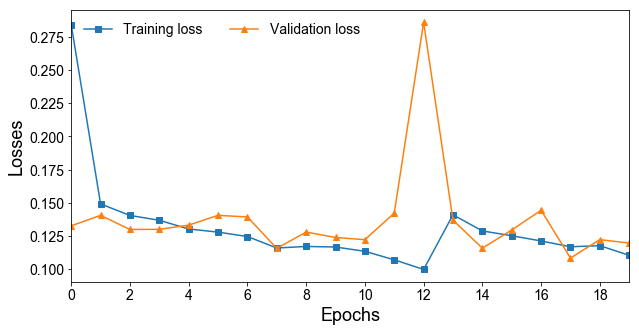

In [3]:
import numpy as np

fig = plt.figure(figsize=(10, 5))
pd_data.loss.plot(style='s-', label='Training loss')
pd_data.val_loss.plot(style='^-', label='Validation loss')

ts_in_epochs = pd_data["epoch"].tolist()
ts_xlabels = np.arange(0, len(ts_in_epochs), 2)
plt.xticks(ts_xlabels, ts_xlabels, fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("Epochs", axis_font)
plt.ylabel("Losses", axis_font)
plt.legend(ncol=2, frameon=False, fontsize=14)

#### Long short-term memory (LSTM)
```python3
$ python3 ./LSTM.py -e -i ./../data/jena_climate_2009_2016.csv

Where,
-e: merge embedded columns
-p: hours for prediction (default=24 hours)
```

In [7]:
pd_LSTM = pd.read_csv("./data/LSTM_MLayer_eDefault.log")
pd_LSTM.head()

,epoch,loss,val_loss
0,1,0.42222,0.13615
1,2,0.15163,0.13549
2,3,0.13894,0.13598
3,4,0.13664,0.13696
4,5,0.13117,0.15384


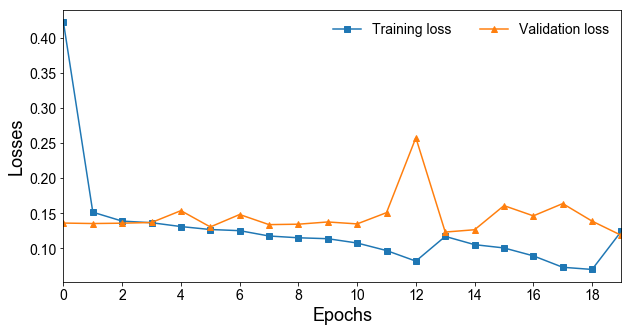

In [8]:
fig = plt.figure(figsize=(10, 5))
pd_LSTM.loss.plot(style='s-', label='Training loss')
pd_LSTM.val_loss.plot(style='^-', label='Validation loss')

ts_in_epochs = pd_LSTM["epoch"].tolist()
ts_xlabels = np.arange(0, len(ts_in_epochs), 2)
plt.xticks(ts_xlabels, ts_xlabels, fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("Epochs", axis_font)
plt.ylabel("Losses", axis_font)
plt.legend(ncol=2, frameon=False, fontsize=14)

#### Remark and Future Direction
- Mean square errors (MSE) are very close to each other between training and validation datasets.
- Outlier loss is observed at 12 epoch for the validation dataset. 
- The best MSE is 0.12 for validation and the model also yielded the  0.12 on the test dataset.